In [10]:
"""
tf 1.5 keras tf 2.3의 차이
    - 정적으로 그래프를 생성
    - 처음 그래프를 정의하고 ( 그래프도 비선형 자료 구조 )
    - run에서 실행
constant(상수), variables(가중치 저장), placeholder(주입 변수)
    - tf는GPU를 염두에 두고 구현
    - CUDA 과학계산에 행렬연산을 GPU에서 하자
    - network 요소 -> Session
keras는 모델만 구현해서 작동
tf 2.3은 eager mode에서 함수및 class base로 작동
"""

import tensorflow as tf
def showvalue(t):
    sess = tf.InteractiveSession() # 대화형 세션
    tf.global_variables_initializer().run() # 변수가 있으면 반드시 초기화
    print(t.eval())
    sess.close()

In [15]:
c2, c3 = tf.constant([1.2, 5.6]), tf.constant([-4, -1, 7])
v2, v3 = tf.Variable([2.3, 4.5]), tf.Variable([-2, 3, 5])
showvalue(tf.add_n([c2, v2])) # n: 여러개 벡터 행렬연산에서 일반 +,-,/,*는 요소별 연산
showvalue(tf.add_n([c3, v3, v3]))
showvalue(tf.sqrt(tf.cast(v3, tf.float64))) # math 함수들이 동작 : 내부에 정의

[ 3.5 10.1]
[-8  5 17]
[       nan 1.73205081 2.23606798]


In [16]:
# tensorflow는 numpy와 호환
def run_variables(variable):
    tf.global_variables_initializer()
    with tf.Session() as sess:
        return sess.run(variable)

<class 'numpy.ndarray'>


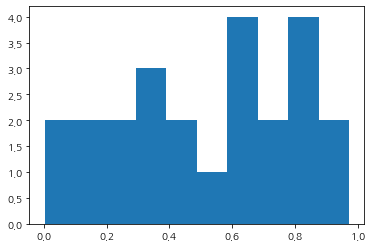

In [25]:
%matplotlib inline
my_distribution = tf.random_uniform((6, 4), seed=42)
uniform = run_variables(my_distribution)
print(type(run_variables(my_distribution))) # ndarray 

from matplotlib import pyplot as plt
plt.hist(uniform.flatten())
plt.show()

In [38]:
a = tf.constant([1, 2, 3, 4, 5, 6], shape=[2, 3])
b = tf.constant([7, 8, 9, 10, 11, 12], shape=[3, 2])
sess = tf.Session() # 세션작업 : 최우선

result = tf.matmul(a,b)
print(result) # graph는 노드와 노드(계산식)로 구성되고 텐서로 연결
sess.run(result) # 호출할때 연산 실행 ( 앞단의 노드가 모두 실행이 되어야 실행 )

# 이유 : 분산처리가 가능하게 하기 위해서

Tensor("MatMul_2:0", shape=(2, 2), dtype=int32)


array([[ 58,  64],
       [139, 154]])

In [40]:
diagonal = [1,2,3,4]
dia = tf.diag(diagonal) # 대각행렬 -> 내부적으로 그래프를 생성
print(sess.run(dia)) # 런시켜줘야..
print()
print(sess.run(tf.diag_part(dia))) # 대각요소만 추출
print()
print(sess.run(tf.trace(dia))) # 대각합
print()
#선형대수나 math를 사용하는 구조가 넘파이와 동일
x = tf.transpose(dia) # 전치
print(sess.run(x))

[[1 0 0 0]
 [0 2 0 0]
 [0 0 3 0]
 [0 0 0 4]]

[1 2 3 4]

10

[[1 0 0 0]
 [0 2 0 0]
 [0 0 3 0]
 [0 0 0 4]]


In [43]:
t = [1,2,3,4,5,6,7,8,9]
print(sess.run(tf.reshape(t, [3,3])))

[[1 2 3]
 [4 5 6]
 [7 8 9]]


In [44]:
x = tf.Variable(0, name='x') # 두가지 용도 1. 그래프출력시 노드를 확인 2. 모델을 저장하고 로딩시 구분
model = tf.global_variables_initializer()
with tf.Session() as session: # with를 쓰면 실행후 세션 자동으로 클로즈 : session close
    for i in range(5):
        session.run(model)
        x = x + 1
        print(session.run(x))

1
2
3
4
5


In [49]:
# 문제 1 ~ 10까지의 합을 구하시오
x = tf.Variable(0, name='x') # 두가지 용도 1. 그래프출력시 노드를 확인 2. 모델을 저장하고 로딩시 구분
hap = tf.Variable(0, name='hap')
model = tf.global_variables_initializer()
with tf.Session() as session: # with를 쓰면 실행후 세션 자동으로 클로즈 : session close
    for i in range(100):
        session.run(model)
        x = x + 1
        hap = hap + x
#         print(session.run(x))
    print("1-100까지의 합=", session.run(hap))

1-100까지의 합= 5050


In [ ]:
"""
tensor flow 변수의 종류 : constant, variables(가중치), placeholder(주입변수)
- GPU 메모리 영역은 용도가 다름
- GPU 메모리는 용량이 적음 (CPU에 비해)
- GPU : 부동 소수점 연산기가 많음 최소 : 1024 (CPU 한자리수...)
- 데이터는 fully-connected ( 일렬로 서서 - 내적연산위해 )
- 가중치학습 - cost function(비용함수) : 결과
    - 연속형 identity -> MSE(mean square error)
    - 범주형 softmax -> cross entropy
- 값의 추가나 비활성화 - activation function(활성화함수)
    - sigmoid(기울기 소실) -> tanh(-1 ~ 1) -> Relu(0보다 큰것만 취급: 0이하제거) -> softplus
    - LeakRelu(-1 까지 고려) -> elu(지수형)
- 미분 방향값 결정, learning rate를 조절하는 optimizer
    - Adagrad, RMSprop(tm), Adam, Nadam
"""

In [50]:
#플레이스 홀더 placeholder
import tensorflow as tf
import numpy as np

# 대량의 데이터를 다루기 때문에 변수타입 세분화
# 계산 그래프를 구성 ( 계산식은 노드, 노드와 노드를 연결 = 텐서 플로우)
a = tf.placeholder(tf.int32, shape=[2], name="my_input") # 외부 주입 변수
b = tf.reduce_prod(a, name='prod_b')
c = tf.reduce_sum(a, name='sum_c')
d = tf.add(b, c, name='add_d')
# d=(a1*a2)+(a1+a2)
sess = tf.Session()

input_dict = {a:np.array([5,3], dtype=np.int32)} # a와 대입
sess.run(d, feed_dict=input_dict) # d 호출

23

In [2]:
import tensorflow as tf
tf.__version__

'1.15.3'

In [3]:
from tensorflow.examples.tutorials.mnist import input_data# examples 모듈이 없는 문제 발생 # 따로 다운받아서 해결
mnist = input_data.read_data_sets("/tmp/data", one_hot=True) # y값을 원핫인코딩
learning_rate = 0.01 #학습률
training_epochs = 25 # 반복학습 횟수
batch_size = 100 # mini batch size 전체데이터를 100개로 분할 : ex) 데이터 50000장 이미지 => 500덩어리 * 25번(에포크)
display_epoch = 1  
logs_path = '/tmp/tensorflow_logs/example/' # tensoboard 저장 폴더

# 외부 주입 변수 : GPU사용.. 메모리가 작아서..
x = tf.placeholder(tf.float32, [None, 784], name="InputData") # 독립변수
y = tf.placeholder(tf.float32, [None, 10], name="LabelData") # 종속변수 class : 10


# 100x784 784x10 # 역전파가 들어올경우 수정되는변수
W = tf.Variable(tf.zeros([784, 10]), name='Weight') 
b = tf.Variable(tf.zeros([10]), name='Bias') #바이아스
# 마지막 activation 활성화 함수는 연속형: mse 범주형 : softmax
pred = tf.nn.softmax(tf.matmul(x, W) + b) # 100x10 # 소프트맥스 - 확률로 표현  #예측

# cross-entropy = 실제값 * log(예측값) : 분류할때 사용
# 평균비용함수
cost = tf.reduce_mean(-tf.reduce_sum(y * tf.log(pred), reduction_indices=1))
# 최적화기를 지정 : 경사하강법을 사용 # 비용함수 최소화
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

# 숫자 0 1 2 3 4 5 6 7 8 9
        
# 인덱스 0 1 2 3 4 5 6 7 8 9
acc = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))
acc = tf.reduce_mean(tf.cast(acc, tf.float32)) #형변 # 1의갯수 / 전체갯수 = 확률  #평가

init = tf.global_variables_initializer()
tf.summary.scalar('loss', cost) # 텐서보드에 정보 저장하기전에 정보를 모음
tf.summary.scalar('accuracy', acc)
merged_summary_op = tf.summary.merge_all()

"""

"""

Extracting /tmp/data\train-images-idx3-ubyte.gz
Extracting /tmp/data\train-labels-idx1-ubyte.gz
Extracting /tmp/data\t10k-images-idx3-ubyte.gz
Extracting /tmp/data\t10k-labels-idx1-ubyte.gz


'\n\n'

In [5]:
with tf.Session() as sess:
    sess.run(init)
    summary_writer = tf.summary.FileWriter(logs_path, graph=tf.get_default_graph())
    for epoch in range(training_epochs): # 동일한 데이터를 25번 실행
        avg_cost = 0.
        total_batch = int(mnist.train.num_examples / batch_size)
        for i in range(total_batch):
            # 데이터를 100개씩 자동으로 피딩
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            _, c, summary = sess.run([optimizer, cost, merged_summary_op],
                                    feed_dict={x: batch_xs, y: batch_ys})
            summary_writer.add_summary(summary, epoch * total_batch + i)
            avg_cost += c / total_batch # 저장, 출력
        if(epoch+1) % display_epoch == 0: # 매세대(epoch)마다 출력
            print("Epoch:", "%04d" % (epoch+1), "cost=", "{:.9f}".format(avg_cost))
            
    print("최적화 종료")
    # 수식으로 평가 : 테스트데이터로 평가
    # 미니배치 사이즈와 테스트 데이터 사이즈 다름
    print("Accuracy :", acc.eval({x:mnist.test.images, y:mnist.test.labels}))
    #http://localhost:6006/ 에서 확인 가능

Epoch: 0001 cost= 1.183686345
Epoch: 0002 cost= 0.665305572
Epoch: 0003 cost= 0.552841093
Epoch: 0004 cost= 0.498693183
Epoch: 0005 cost= 0.465538298
Epoch: 0006 cost= 0.442620860
Epoch: 0007 cost= 0.425537186
Epoch: 0008 cost= 0.412225528
Epoch: 0009 cost= 0.401411466
Epoch: 0010 cost= 0.392381908
Epoch: 0011 cost= 0.384813541
Epoch: 0012 cost= 0.378173007
Epoch: 0013 cost= 0.372434874
Epoch: 0014 cost= 0.367323303
Epoch: 0015 cost= 0.362740522
Epoch: 0016 cost= 0.358629506
Epoch: 0017 cost= 0.354918698
Epoch: 0018 cost= 0.351479154
Epoch: 0019 cost= 0.348330135
Epoch: 0020 cost= 0.345390954
Epoch: 0021 cost= 0.342736789
Epoch: 0022 cost= 0.340242965
Epoch: 0023 cost= 0.337991984
Epoch: 0024 cost= 0.335743727
Epoch: 0025 cost= 0.333711122
최적화 종료
Accuracy : 0.9135
